In [1]:
# Install the latest bio-compose from PyPI:

# !pip install -q bio-compose

In [2]:
# Import the simulation verifier:

import sys 
import os 
sys.path.insert(0, '..')

from bio_compose.verifier import Verifier

In [3]:
# Define sbml verification submission (query) parameters (Uniform Time Course) for BioModel 0001:

# model parameters
sbml_fp = '../tests/fixtures/sbml-core/BIOMD0000000001_url.xml'
simulators = ['amici', 'copasi', 'tellurium']

# "time" parameters
start_time = 0  # 'start'
end_time = 100  # 'end'
n_steps = 1000  # 'steps'

# comparison parameters 
rtol = None  # if this parameter is omitted from the submission, its default value is 1e-4
atol = 1e-08  # here we are using the defaults used by np.allclose as an example of custom tolerances. Otherwise, max(1e-3, max1 * 1e-5, max2 * 1e-5) where max1 is the max() of the given piecewise arrays.

In [4]:
# instantiate a new Verifier:

verifier = Verifier()

In [ ]:
# use the Verifier instance to submit a new simulation verification to the server using aforementioned query parameters:

submission = verifier.verify_sbml(
    entrypoint=sbml_fp,
    start=start_time,
    end=end_time,
    steps=n_steps,
    simulators=simulators,
    rTol=rtol,
    aTol=atol,
    # selection_list=['<ANY SIMULATION OBSERVABLE NAME>']  <-- optionally you can include specific observables in the verification, otherwise include all matching observables.
)

In [5]:
# the verification's status/data can be fetched using the 'job_id' field from the output of the previous cell (submission):

# job_id = submission['job_id']
job_id = 'verification-bio_check-request-d11df32b-0bd4-483e-aca6-eada6d7e1ada-75280da0-187a-43d4-9902-edcb6f63e83b'

# submission

In [9]:
# use the get_output method of Verifier to poll the API for results:

verification_result = verifier.get_output(job_id)

verification_result['content']['results'].keys()

dict_keys(['results', 'rmse'])

In [14]:
# showing a sample output observable proximity comparison:

sample_verification_result = verification_result['content']['results']['results']['BasalACh2']
sample_proximity_matrix = sample_verification_result['proximity']

sample_proximity_matrix

{'amici': {'amici': True, 'copasi': True, 'tellurium': False},
 'copasi': {'amici': True, 'copasi': True, 'tellurium': False},
 'tellurium': {'amici': False, 'copasi': False, 'tellurium': True}}

In [15]:
# use the verifier's export_csv method to export the ouput data on which the verification is calculated (from each simulator):

csv_dir = os.path.dirname('.')
model_name = verification_result['content']['source'].replace('xml', 'csv')
csv_name = os.path.join(csv_dir, model_name)

verifier.export_csv(data=verification_result, save_dest=csv_name, simulators=simulators)

In [18]:
# csv is saved to the specified destination:

!ls . 

BIOMD0000000001_url.csv verification_demo.ipynb


In [19]:
# Verifier also allows for reading in previously generated observables:

observables_df = verifier.read_observables(csv_name)

observables_df

,BasalACh2_amici,BasalACh2_copasi,BasalACh2_tellurium,IntermediateACh_amici,IntermediateACh_copasi,IntermediateACh_tellurium,ActiveACh_amici,ActiveACh_copasi,ActiveACh_tellurium,Active_amici,...,IntermediateACh2_tellurium,DesensitisedACh_amici,DesensitisedACh_copasi,DesensitisedACh_tellurium,Intermediate_amici,Intermediate_copasi,Intermediate_tellurium,ActiveACh2_amici,ActiveACh2_copasi,ActiveACh2_tellurium
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,7.691286e-08,7.691277e-08,3.259123e-06,1.007080e-05,1.007081e-05,3.259123e-06,3.259133e-06,3.259130e-06,3.259123e-06,3.259133e-06,...,3.259123e-06,1.549006e-10,1.549004e-10,3.259123e-06,7.246026e-11,7.246031e-11,3.259123e-06,3.259133e-06,3.259130e-06,3.259123e-06
2,3.521841e-08,3.521842e-08,1.497125e-06,1.349345e-05,1.349345e-05,1.497125e-06,1.497137e-06,1.497138e-06,1.497125e-06,1.497137e-06,...,1.497125e-06,4.774251e-10,4.774251e-10,1.497125e-06,9.623627e-11,9.623626e-11,1.497125e-06,1.497137e-06,1.497138e-06,1.497125e-06
3,2.129838e-08,2.129844e-08,9.088576e-07,1.458558e-05,1.458558e-05,9.088576e-07,9.088536e-07,9.088561e-07,9.088576e-07,9.088536e-07,...,9.088576e-07,8.545181e-10,8.545182e-10,9.088576e-07,1.038153e-10,1.038152e-10,9.088576e-07,9.088536e-07,9.088561e-07,9.088576e-07
4,1.662165e-08,1.662168e-08,7.111883e-07,1.490237e-05,1.490237e-05,7.111883e-07,7.111799e-07,7.111812e-07,7.111883e-07,7.111799e-07,...,7.111883e-07,1.248491e-09,1.248491e-09,7.111883e-07,1.060057e-10,1.060057e-10,7.111883e-07,7.111799e-07,7.111812e-07,7.111883e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,3.843876e-248,-7.766929e-27,-5.707273e-40,8.501641e-244,-1.712865e-22,-5.707273e-40,2.525536e-246,-5.103007e-25,-5.707273e-40,2.525536e-246,...,-5.707273e-40,2.859949e-141,-2.951451e-16,-5.707273e-40,4.838494e-09,4.838493e-09,-5.707273e-40,2.525536e-246,-5.103007e-25,-5.707273e-40
997,2.040896e-248,-7.308902e-27,-5.598485e-40,4.513241e-244,-1.611855e-22,-5.598485e-40,1.340925e-246,-4.802075e-25,-5.598485e-40,1.340925e-246,...,-5.598485e-40,1.935094e-141,-2.804159e-16,-5.598485e-40,4.838432e-09,4.838431e-09,-5.598485e-40,1.340925e-246,-4.802075e-25,-5.598485e-40
998,1.043402e-248,-6.843231e-27,-5.486482e-40,2.307369e-244,-1.509159e-22,-5.486482e-40,6.855444e-247,-4.496121e-25,-5.486482e-40,6.855444e-247,...,-5.486482e-40,1.309320e-141,-2.654388e-16,-5.486482e-40,4.838371e-09,4.838370e-09,-5.486482e-40,6.855444e-247,-4.496121e-25,-5.486482e-40
999,5.124101e-249,-6.369875e-27,-5.371243e-40,1.133295e-244,-1.404768e-22,-5.371243e-40,3.366680e-247,-4.185118e-25,-5.371243e-40,3.366680e-247,...,-5.371243e-40,8.859100e-142,-2.502126e-16,-5.371243e-40,4.838309e-09,4.838308e-09,-5.371243e-40,3.366680e-247,-4.185118e-25,-5.371243e-40


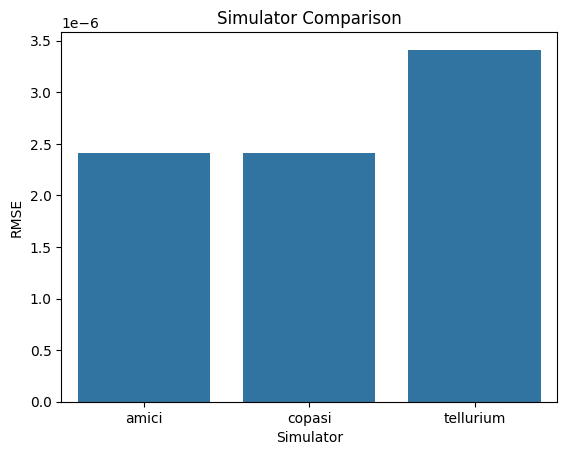

<Axes: title={'center': 'Simulator Comparison'}, xlabel='Simulator', ylabel='RMSE'>

In [20]:
# visualize multiple aspects of the verification result including: observables data, mean square error for each observable (for each simulator)... 
    # ...or in this case, RMSE results for each simulator accross all observables

verifier.visualize_rmse(verification_result)